# Recommendation Systems 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from ETL import ETL_class

In [2]:
path_rating = './dataset/ratings/'
path_titles = './dataset/titles/'
etl = ETL_class(path_titles, path_rating)

df_movies = etl.get_movies()[['id', 'title', 'listed_in']].rename(columns={'listed_in': 'genre'})
print(df_movies.shape)
df_movies.head()

(22998, 3)


,id,title,genre
0,as1,the grand seduction,"comedy, drama"
1,as2,take care good night,"drama, international"
2,as3,secrets of deception,"action, drama, suspense"
3,as4,pink: staying true,documentary
4,as5,monster maker,"drama, fantasy"


In [3]:
df_ratings = etl.get_ratings()[['userId', 'rating', 'movieId']].rename(columns={'movieId':'id'})
print(df_ratings.shape)
df_ratings.head()

(11024165, 3)


,userId,rating,id
0,1,1.0,as680
1,1,4.5,ns2186
2,1,5.0,hs2381
3,1,5.0,ns3663
4,1,5.0,as9500


In [18]:
df_count = df_ratings[['id', 'userId']].groupby('id').count()
df_count['movieId'] = np.arange(1,df_count.shape[0] +1,1)/(10**5)
df = pd.merge(df_ratings, df_count, on='id', how='left').rename(columns={'userId_x':'userId','userId_y':'count'})
df = df[df['count'] >= 500]
print(df.shape)
df.head()
# df_count

(2158026, 5)


,userId,rating,id,count,movieId
1,1,4.5,ns2186,501,0.15511
5,1,4.0,as3004,506,0.02230
13,1,3.5,ns3830,527,0.17338
16,1,5.0,hs2056,507,0.12294
17,1,5.0,ns5413,521,0.19097


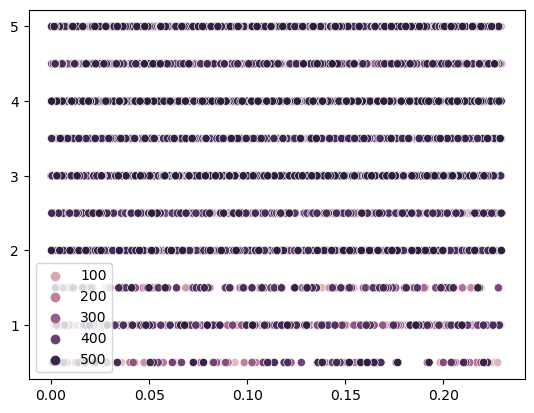

In [23]:
plt.figure()
max_lim = 10000
sns.scatterplot(x = df['movieId'].values[:max_lim], y = df['rating'].values[:max_lim], hue = df['userId'].values[:max_lim])
plt.show()

In [11]:
X = df[['userId','id']].values
y = df['rating'].values
print(X.shape)
print(y.shape)

(2158026, 2)
(2158026,)
